Linear Regression Results:
 - MSE: 160.68
 - R²: -0.54



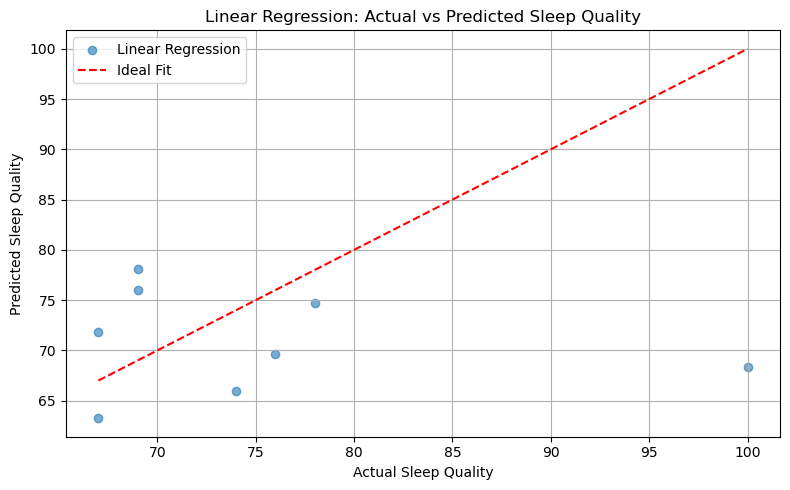

Decision Tree Results:
 - MSE: 177.38
 - R²: -0.70



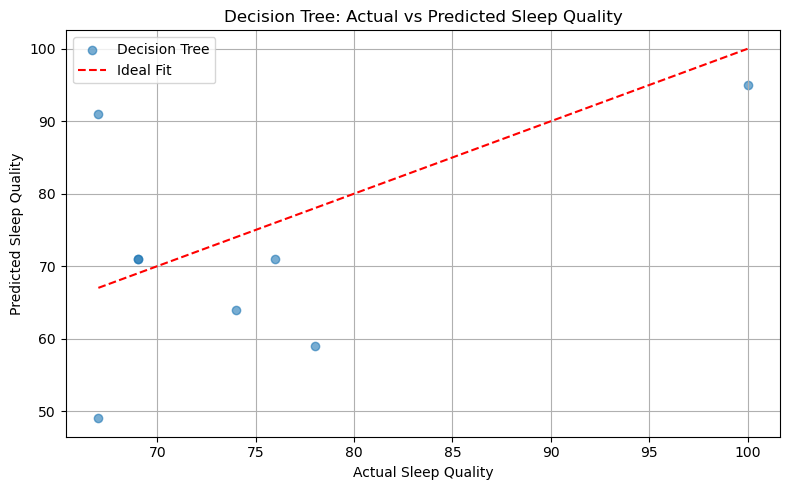

Random Forest Results:
 - MSE: 181.00
 - R²: -0.73



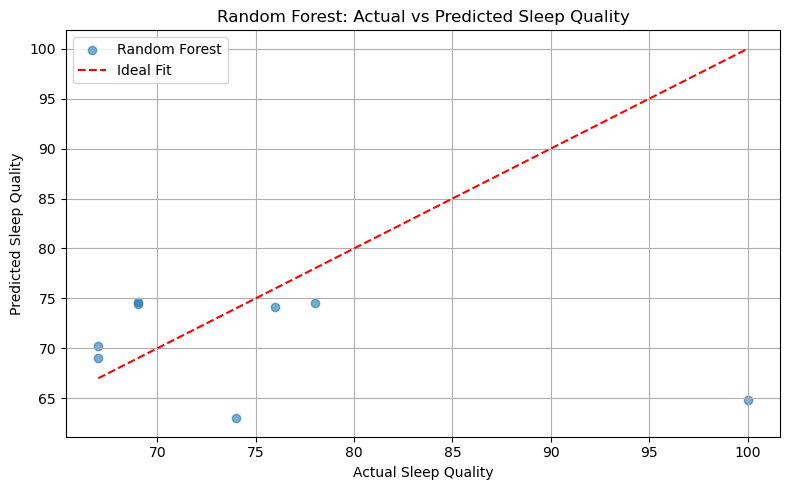

Best Performing Model: Linear Regression (R² = -0.54)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('all_data_combined.csv', dayfirst=True, parse_dates=['date'])
df = df.drop(columns=['date', 'sleep_start', 'sleep_end'])

features = [
    'total_screen_minutes',
    'screen_social_minutes',
    'screen_entertainment_minutes',
    'screen_morning_minutes',
    'screen_afternoon_minutes',
    'screen_evening_minutes',
    'screen_night_minutes',
    'daily_unlocks'
]
X = df[features]
y = df['sleep_quality_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}
    print(f"{name} Results:\n - MSE: {mse:.2f}\n - R²: {r2:.2f}\n")

    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', label="Ideal Fit")
    plt.title(f"{name}: Actual vs Predicted Sleep Quality")
    plt.xlabel("Actual Sleep Quality")
    plt.ylabel("Predicted Sleep Quality")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

best = max(results, key=lambda x: results[x]['R²'])
print(f"Best Performing Model: {best} (R² = {results[best]['R²']:.2f})")